In [1]:
import os 
print(os.getcwd())
# %matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re
# %matplotlib notebook
# %matplotlib widget

c:\Users\natha\Google Drive\Grad\Spring2021\ECE696\Demo\ECEMasterProject\notebooks


In [2]:
# data = pd.read_hdf('../models/Qtables/qtable_ep_1000.pickle.h5')
# data

In [3]:
# stamp = '04_07_14_29'

# stamp = '04_07_17_55'  #state not w/ inculding available edges
# stamp = '04_07_18_22' #state w/ available edges
# stamp = '04_1_14_28' #state w/ binary available edges
# stamp = '04_21_23_19' #reward fine tuning (charge too high)
# stamp = '04_22_00_57' #reward fine tuning (unload too high)
# stamp = '04_22_01_17'
# stamp = '04_22_01_58' #reward fine tune, unloaed higher than charge, charge higher than mostly everything
# stamp = '04_22_02_13' #long run, stand obs round no reard


# stamp = '04_23_04_53' #round 2/3 for obs

# stamp = '04_23_18_06' #test?

stamp = '04_23_19_14' #round 0 for obs


reward_df = pd.read_csv(f'../RL/agent/Sim_Data/reward_{stamp}.csv')  

QTABLEFOLDER = f'../models/Qtables/{stamp}/'
filenames = os.listdir(QTABLEFOLDER)
filenames.sort(key = lambda f: int(re.sub('/D', '', f.split("_")[2].split(".")[0])))
# filenames
x_0 = int(filenames[0].split("_")[2].split(".")[0])
x_1 = int(filenames[1].split("_")[2].split(".")[0])
delta = x_1 - x_0
# delta 
filenames

['qtable_ep_5000.pickle.h5',
 'qtable_ep_10000.pickle.h5',
 'qtable_ep_15000.pickle.h5',
 'qtable_ep_20000.pickle.h5',
 'qtable_ep_25000.pickle.h5',
 'qtable_ep_30000.pickle.h5',
 'qtable_ep_35000.pickle.h5',
 'qtable_ep_40000.pickle.h5',
 'qtable_ep_45000.pickle.h5',
 'qtable_ep_50000.pickle.h5',
 'qtable_ep_55000.pickle.h5']

In [4]:
filenames[0].split("_")[2].split(".")[0]

'5000'

In [5]:
qtabledfs_list  = []
for name in filenames:
    qtabledfs_list.append(pd.read_hdf(QTABLEFOLDER+name))


In [6]:
qtabledfs_list[-1]

,nothing,chargeup,unload,0,1,2,3,4
"(5, 0, 0, 0, 21.0, 1, 0, 12.0, 1, 0, 29.0, 1, 1, 20.0, 1, 40.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(5, 12.0, 1, 0, 33.0, 0, 0, 0, 0, 0, 25.0, 1, 1, 31.0, 0, 37.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(5, 0, 0, 0, 21.0, 1, 0, 12.0, 1, 0, 29.0, 1, 1, 20.0, 1, 34.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(5, 29.0, 1, 0, 28.0, 1, 0, 25.0, 1, 0, 0, 0, 1, 25.0, 1, 26.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(5, 20.0, 1, 0, 11.0, 1, 0, 31.0, 0, 0, 25.0, 1, 1, 0, 0, 19.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
"(1, 11.0, 1, 5, 10.0, 1, 0, 6.0, 1, 0, 8.0, 1, 0, 0, 0, 37.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 19.0, 0, 5, 18.0, 0, 0, 11.0, 1, 0, 0, 0, 0, 8.0, 1, 35.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 10.0, 0, 5, 10.0, 1, 0, 0, 0, 0, 11.0, 1, 0, 6.0, 1, 32.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 11.0, 1, 5, 10.0, 1, 0, 6.0, 1, 0, 8.0, 1, 0, 0, 0, 30.0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
qtabledfs_list[-1].describe()

,nothing,chargeup,unload,0,1,2,3,4
count,401994.000000,401994.000000,401994.000000,401994.000000,401994.000000,401994.000000,401994.000000,401994.000000
mean,0.001022,0.001103,0.001286,0.000721,0.000702,0.000687,0.000684,0.000668
std,0.009237,0.008818,0.007311,0.006573,0.006411,0.006437,0.006338,0.006066
min,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.420317,0.397997,0.321819,0.314925,0.420317,0.387963,0.386962,0.429512


In [8]:
nothing_rew = []
chargeup_rew = []
unload_rew = []
node0_rew = []
node1_rew = []
node2_rew = []
node3_rew = []
node4_rew =[]
epcount = []
i=0
for qtable in qtabledfs_list:
    nothing_rew.append(qtable['nothing'].mean())
    chargeup_rew.append(qtable['chargeup'].mean())
    unload_rew.append(qtable['unload'].mean())
    node0_rew.append(qtable[0].mean())
    node1_rew.append(qtable[1].mean())
    node2_rew.append(qtable[2].mean())
    node3_rew.append(qtable[3].mean())
    node4_rew.append(qtable[4].mean())
    i += delta
    epcount.append(i)


In [9]:
labels = ['nothing','chargeup','unload','0','1','2','3','4','5']
labels2 = [f'Ep - {ep}' for ep in epcount]

Text(0.5, 1, 'Avg Action Reward per Episode')

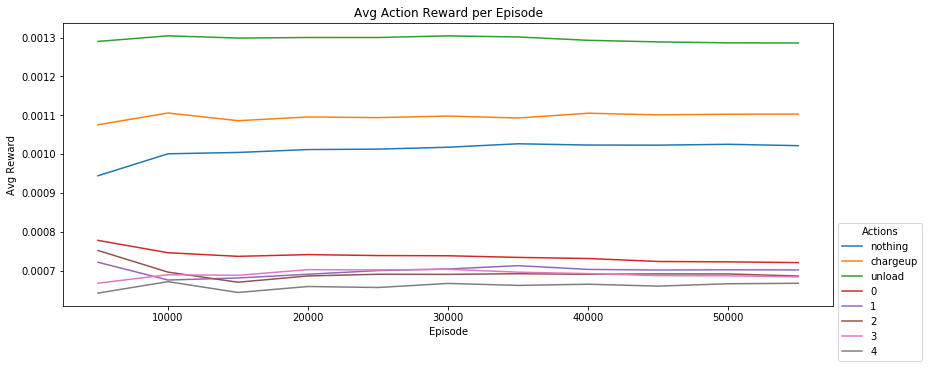

In [10]:

fig, ax = plt.subplots()
# plt.ion()
ax.plot(epcount,nothing_rew , label = labels[0] )
ax.plot(epcount,chargeup_rew , label = labels[1] )
ax.plot(epcount, unload_rew, label = labels[2])
ax.plot(epcount, node0_rew, label = labels[3])
ax.plot(epcount, node1_rew, label = labels[4])
ax.plot(epcount, node2_rew, label = labels[5] )
ax.plot(epcount,node3_rew , label = labels[6])
ax.plot(epcount,node4_rew , label = labels[7])

ax.set_ylabel('Avg Reward')
ax.set_xlabel('Episode')
plt.legend(loc = 'center left', bbox_to_anchor = (1,.05), title = 'Actions')
fig.set_size_inches(13, 5)
fig.tight_layout()
fig.patch.set_facecolor('w')
ax.set_title('Avg Action Reward per Episode')
# def onclick(event):
#     pos.append([event.xdata,event.ydata])
# fig.canvas.mpl_connect('button_press_event', onclick)
# fig.show()
# plt.ion()
# ax.ion()

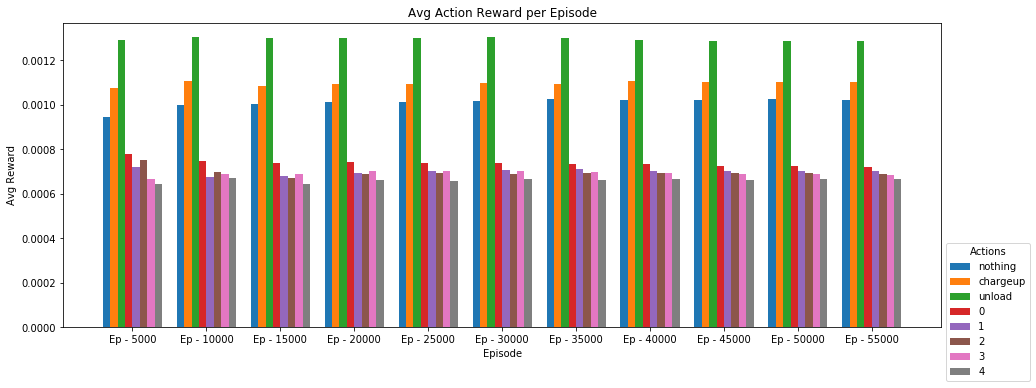

In [11]:
x = np.arange(len(labels2))

w = .1 

fig,ax = plt.subplots()

ax.bar(x - 7*w/2, nothing_rew, width =w,label = labels[0])
ax.bar(x - 5*w/2, chargeup_rew, width =w,label = labels[1])
ax.bar(x - 3*w/2, unload_rew, width =w,label = labels[2])
ax.bar(x - 1*w/2,node0_rew, width =w,label = labels[3])
ax.bar(x + 1*w/2,node1_rew, width =w,label = labels[4])
ax.bar(x + 3*w/2,node2_rew, width =w,label = labels[5])
ax.bar(x + 5*w/2,node3_rew, width =w,label = labels[6])
ax.bar(x + 7*w/2,node4_rew, width =w,label = labels[7])

ax.set_ylabel('Avg Reward')
ax.set_xlabel('Episode')
ax.set_title('Avg Action Reward per Episode')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
plt.legend(loc = 'center left', bbox_to_anchor = (1,.05), title = 'Actions')
fig.set_size_inches(14.5, 5.5)
fig.tight_layout()
fig.patch.set_facecolor('w')



In [12]:
def normalize(raw):
    small = min(raw)
    shifted = [x+abs(small) for x in raw]
    return [float(i)/max(shifted) for i in shifted]
action_matrix = np.array([nothing_rew,chargeup_rew, unload_rew,node0_rew, node1_rew,node2_rew,node3_rew, node4_rew]).T
norm_actions = []
for row in action_matrix:
    norm_actions.append(normalize(row))
norm_actions_matrix = np.array(norm_actions).T


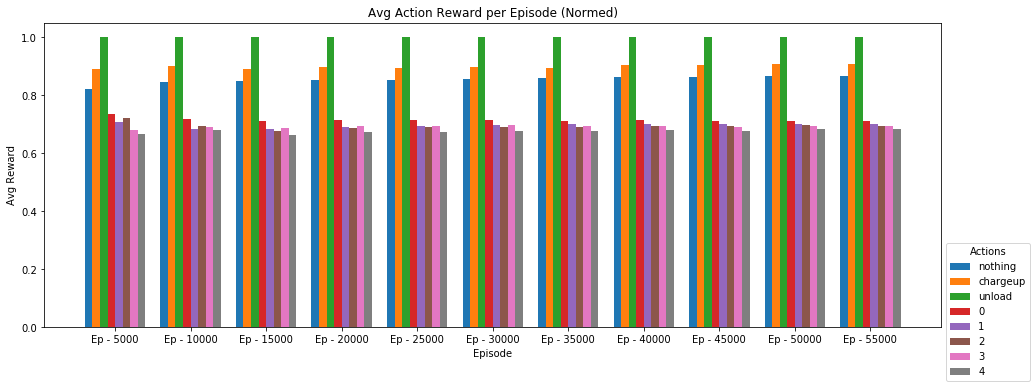

In [13]:
x = np.arange(len(labels2))

w = .1 

fig,ax = plt.subplots()

ax.bar(x - 7*w/2, norm_actions_matrix[0], width =w,label = labels[0])
ax.bar(x - 5*w/2, norm_actions_matrix[1], width =w,label = labels[1])
ax.bar(x - 3*w/2, norm_actions_matrix[2], width =w,label = labels[2])
ax.bar(x - 1*w/2,norm_actions_matrix[3], width =w,label = labels[3])
ax.bar(x + 1*w/2,norm_actions_matrix[4], width =w,label = labels[4])
ax.bar(x + 3*w/2,norm_actions_matrix[5], width =w,label = labels[5])
ax.bar(x + 5*w/2,norm_actions_matrix[6], width =w,label = labels[6])
ax.bar(x + 7*w/2,norm_actions_matrix[7], width =w,label = labels[7])

ax.set_ylabel('Avg Reward')
ax.set_xlabel('Episode')
ax.set_title('Avg Action Reward per Episode (Normed)')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
plt.legend(loc = 'center left', bbox_to_anchor = (1,.05), title = 'Actions')
fig.set_size_inches(14.5, 5.5)
fig.tight_layout()
fig.patch.set_facecolor('w')


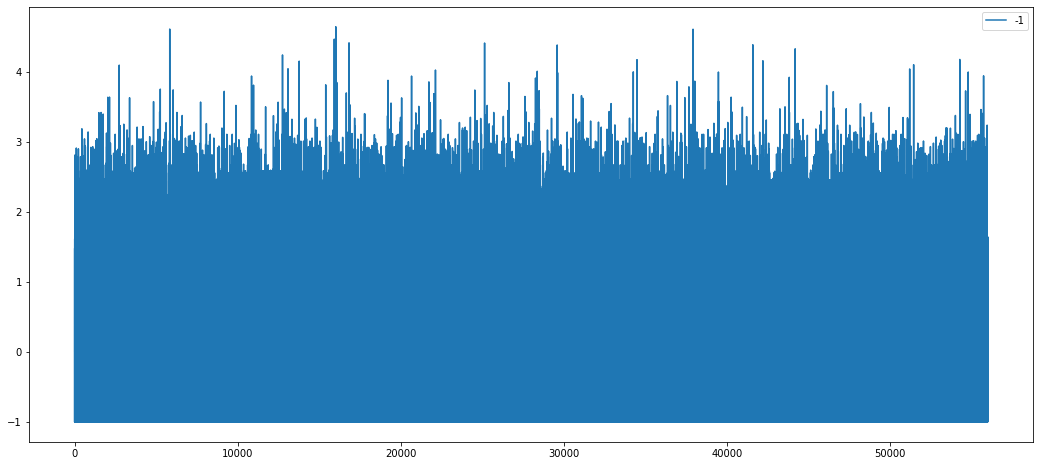

In [14]:
reward_df.plot(figsize=(18, 8))

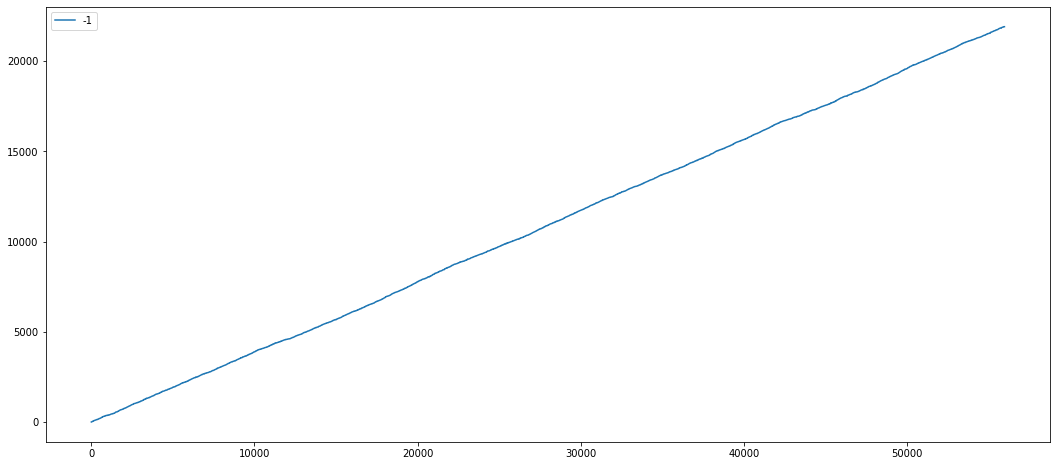

In [15]:
reward_df.cumsum().plot(figsize=(18, 8));

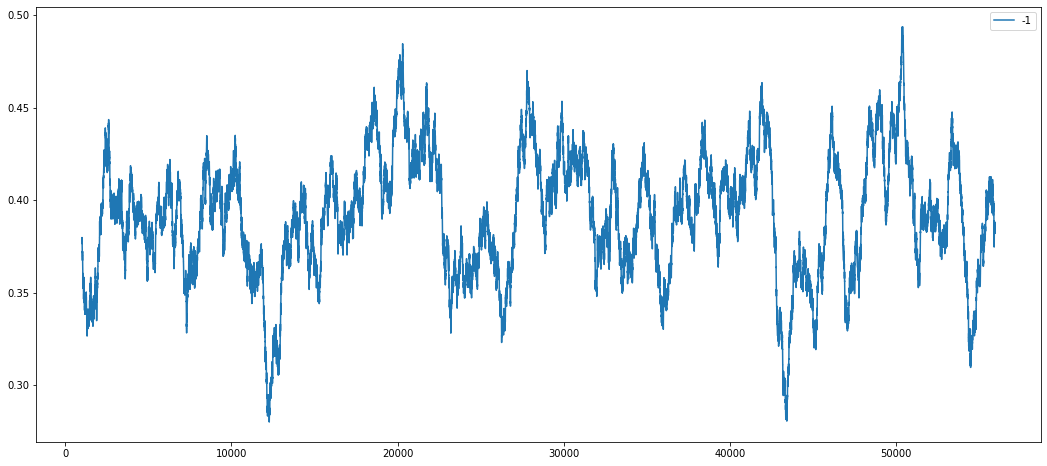

In [16]:
reward_df.rolling(1000).mean().plot(figsize=(18, 8))

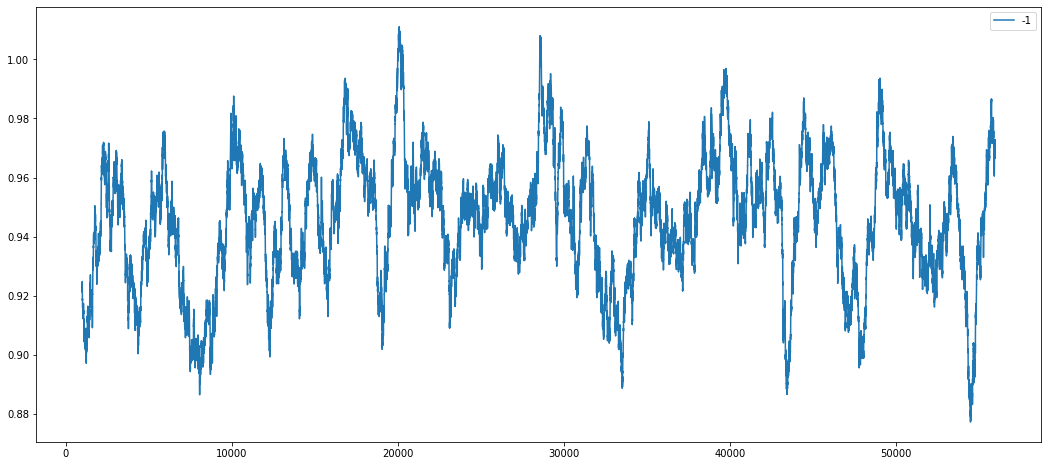

In [17]:
reward_df.rolling(1000).std().plot(figsize=(18, 8))